### Homework #08

#### Table of contents
1. [Problem One](#Problem-one)
   1. [Step 1: set variables](#Step-1.1)
   2. [Step 2: flow variables](#Step-1.2)
   3. [Step 3: wall shear stress](#Step-1.3)
2. [Problem Two](#Problem-two)
   1. [Step 1: set variables](#Step-2.1)
   2. [Step 2: time to steady state](#Step-2.2)
   3. [Step 3: rising hydrograph](#Step-2.3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Problem 1

Assume that free-surface flow over a plane uniform surface with slope S0=0.03 and length L=100 m, resulting from a steady rain intensity, P=25 mm/h, can be described by the kinematic wave method. Assume that the flow dynamics can be described by <mark> Manning’s equation.</mark> Compute all flow variables (h, V and q) at 10 m intervals at steady state. Assume that the roughness coefficient n=0.02 is not affected by the impact of raindrops. Show how you obtain this answer. Also, compute the wall shear stress along this flow at same spatial intervals. Knowing that the entrainment shear stress for fine sediments on the plane is 0.75 Pa, where along the plane will erosion likely take place?

---

##### Step 1.1
*Set the variables and convert units as necessary*

In [ ]:
# set values for Kinematic wave function variables 
So = 0.03           # [-] slope
L = 100             # [meters]
PP = 25             # [mm/h]
i = PP/1000/3600    # [m/s]

# use variables for Manning's equation
n = 0.02            # [-]
Cr = 1/n            # [-]
a = 2/3             # [-] 
b = 1/2             # [-] 

delx = 10           # [m] flow variables to be computed at 10m intervals

# create dataframe to receive calculated flow variables
df = pd.DataFrame(index = np.arange(0, L+delx, delx),
                  columns=['q','h','V','tau'])

# the index is horizontal displacement set at 10m intervals
df.index.names = ['x']

##### Step 1.2
*Calculate values of 'q', 'h', and 'V'*

![kinematic wave equation](kinematic-wave-eqn.png)
![friction slope parameterization](friction-slope-parameterization.png)

In [15]:
# multiply each interval by i to calculate q
df.q = df.index * i

# rearrange the friction slope parameterization equation to calculate h
df.h = (df.q*(Cr*So**b)**-1)**(1/(a+1))

# use the q = Vh equivalence to solve for velocity
df.V = df.q/df.h

##### Step 1.3
*Calculate values of 'tau'*

![wall-shear-stress](wall-shear-stress.png)

In [17]:
# set values for physiscal characteristics of  water
rho = 997   # [kg/m3]
g = 9.81    # [m/s2]

# calculate the hydraulic radius
Rh = (df.V*(Cr*So**b)**-1)**(1/a)

# insert radius into original dataframe
df.insert(3, 'Rh', Rh)

# calculate wall shear stress
df.tau = rho*g*So*df.Rh
df

,q,h,V,Rh,tau
x,,,,,
0,0.000000,0.000000,NaN,NaN,NaN
10,0.000069,0.000876,0.079282,0.000876,0.257010
20,0.000139,0.001328,0.104613,0.001328,0.389554
30,0.000208,0.001693,0.123033,0.001693,0.496847
40,0.000278,0.002012,0.138038,0.002012,0.590453
50,0.000347,0.002301,0.150925,0.002301,0.675043
60,0.000417,0.002567,0.162343,0.002567,0.753079
70,0.000486,0.002815,0.172668,0.002815,0.826054
80,0.000556,0.003050,0.182142,0.003050,0.894960


---
---

#### Problem two

A wide concrete pavement is L=50 m long, and it has a slope of S0=0.025. A uniform rainfall starts at t=0, and continues for a long time at a steady rate of P=75 mmh-1. Compute the rising hydrograph (in mmh-1) at the lower end of the pavement, after this rainfall starts. Use the kinematic wave method without the effect of rain on friction losses, and assume the Manning-roughness factor n=0.03. Compute also the recession hydrograph at the lower end of the pavement after the rain stops. Present your results graphically.

---

##### Step 2.1
*Set the variables and convert as necessary*

In [45]:
# set values for Kinematic wave function variables 
L = 50              # [m]
So = 0.025          # [-]
PP = 75             # [mm/h]
i = PP/1000/3600    # [m/s]

# use variables for Manning's equation
n = 0.03            # [-]
Cr = 1/n            # [-]
a = 2/3             # [-] 
b = 1/2             # [-] 

Kr = Cr*So**b

##### Step 2.2
*Calculate time to steady state*

![time to steady state](time-steady-state.png)

In [22]:
ts = (L/(Cr*(So**b)*(i**a)))**(1/(1+a))
ts      # [seconds]

287.5869982453773

##### Step 2.3
*Calculate rising hydropgraph*

![rising hydrograph](rising-hydrograph.png)

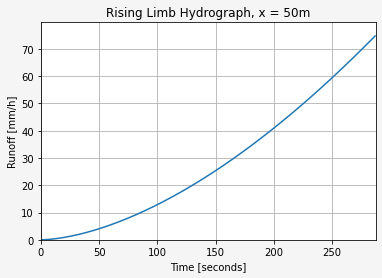

In [40]:
# create dataframe to hold qL values
hg_rising = pd.DataFrame(index = np.arange(0, ts, 1),
                         columns = ['qL', 'flux'])

# set the index to passing time, in seconds
hg_rising.index.names = ['time']

# calculate qL using above equation
hg_rising.qL = Cr*So**b*(i**(a+1))*(hg_rising.index**(a+1))

# convert qL to runoff flux and set in correct units [mm/h]
hg_rising.flux = hg_rising.qL/L*(1000*3600)

# plot rising hydrograph
fig, ax = plt.subplots()

hg_rising.flux.plot(xlabel='Time [seconds]', ylabel='Runoff [mm/h]')

plt.xlim(0, ts); plt.ylim(0,max(hg_rising.flux)+5)
plt.title('Rising Limb Hydrograph, x = 50m')
fig.set_facecolor('whitesmoke')
plt.grid()

##### Step 3
*calculate falling hydrograph*

![falling hydrograph](falling-hydrograph.png)

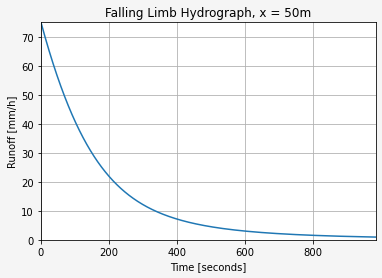

In [66]:
q_at_ts = i*L                       # set limit on qL list
delqL = 0.000001                    # interval for implicit qL values

# create dataframe to receive time values
hg_falling = pd.DataFrame(index = np.arange(delqL, q_at_ts, delqL),
                          columns = ['time', 'qL_normalized', 'qL_mmh'])

hg_falling.index.names = ['qL']     # add name of index
qL = hg_falling.index               # shortcut object name to qL

# calculate the time for corresponding qL values
hg_falling.time = (((a+1)*Kr**(1/(a+1))*i*qL**(a/(a+1)))**-1)*(i*L-qL)

# normalize qL into runoff flux
hg_falling.qL_normalized = qL/L

# convert units of runoff flux to mm/h from m/s
hg_falling.qL_mmh = hg_falling.qL_normalized*(1000*3600)

# truncate list to exclude unnecessary tail end
hg_falling = hg_falling[hg_falling['time'] <= 1000]

# graph recession hydrograph
fig, ax = plt.subplots()
fig.set_facecolor('whitesmoke')

plt.plot(hg_falling.time, hg_falling.qL_mmh)

plt.title('Recession Hydrograph, x = 50m')
plt.xlabel('Time [seconds]')
plt.ylabel('Runoff [mm/h]')
plt.ylim(0, max(hg_falling.qL_mmh)); plt.xlim(0, max(hg_falling.time))
plt.grid()
